# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


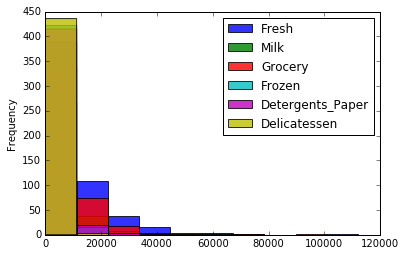

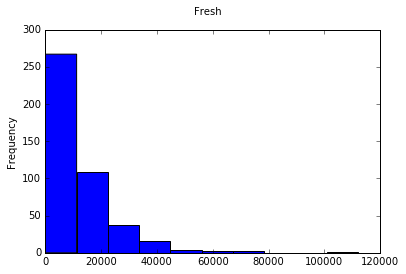

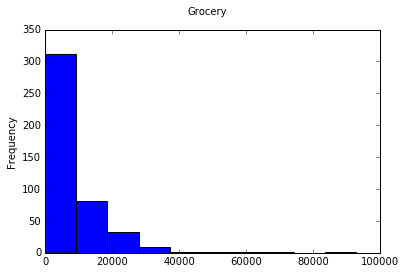

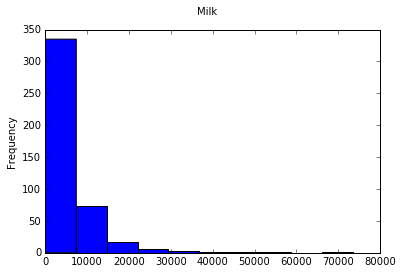

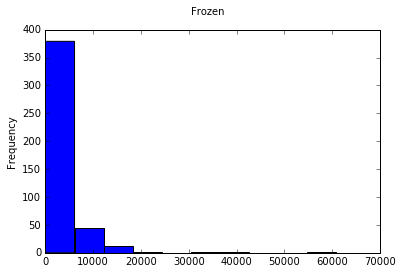

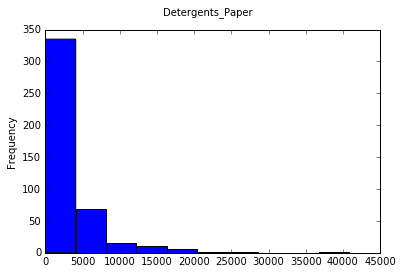

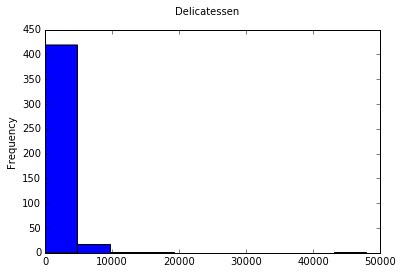

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebooks
%matplotlib inline

# Read dataset
#data = pd.read_csv("milestone1.csv")
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows


data.plot(kind='hist', alpha = 0.8)
plt.show()

data['Fresh'].plot(kind='hist')
plt.suptitle('Fresh')
plt.show()

data['Grocery'].plot(kind='hist')
plt.suptitle('Grocery')
plt.show()

data['Milk'].plot(kind='hist')
plt.suptitle('Milk')
plt.show()

data['Frozen'].plot(kind='hist')
plt.suptitle('Frozen')
plt.show()

data['Detergents_Paper'].plot(kind='hist')
plt.suptitle('Detergents_Paper')
plt.show()

data['Delicatessen'].plot(kind='hist')
plt.suptitle('Delicatessen')
plt.show()

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

PCA: PCA is use to find correlation in the data and it does that by finding the axis which maximizes the variance. If we take a look at the histogram presented above we can see that the first principle component will explain Fresh products because Fresh products have the maximum variance. The second principle component will explain Grocery and so on. 


ICA: It tries to find a linear transformation of feature space into a new feature space such that each of the individual new features are statically independent. In this case ICA will show which commodities are independent of each other. The ICA algorithm will return a six by six matrix of all the features where each row tells us which features are independent of other in each component and this information can be used to divide the customers into different groups. 

###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]

[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]

Data explained by the first two components: 86.4785884939 %


<Container object of 6 artists>

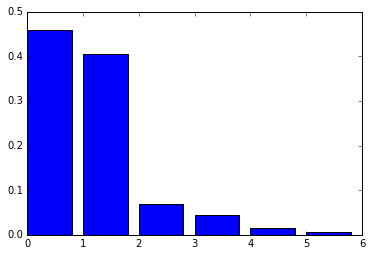

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA, RandomizedPCA

n_data, n_features = data.shape

#n_min = min(n_data,n_features)

pca = PCA(n_components=n_features, copy=True, whiten=True)

pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print
print pca.explained_variance_ratio_
print
print "Data explained by the first two components:",(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])*100,"%"
#plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.bar(np.arange(6),pca.explained_variance_ratio_)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance drops of after the first two principle component. Since the first two principle components explain almost 86% of the data. It is good to take only the first two out of the six principle components.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The dimensions represents the principle components. The first row represents the first component. The second row represents the second component and so on.

We can see how the principle components explain the data and then select the once which explain most of the data. In this case the first two principle components explain 86% of the data. 

The first principle component explains mostly(in descending order) Fresh, Frozen, Milk. The second principle component explains mostly(in descending order) Grocery, Milk, Detergent paper. Now that we know this we can use the first two PCA components that explain most of the data in the data set without much data loss. Therefore, PCA helps us in dimensionality reduction.

###ICA

[[  3.97596282e-06  -8.58804422e-07  -6.27469785e-07  -6.77279603e-07
    2.06698062e-06  -1.04227439e-06]
 [  2.10733777e-07  -1.87975348e-06   6.42278616e-06   4.11383263e-07
   -8.04988405e-07  -1.45823313e-06]
 [  1.53023680e-07   9.84836364e-06  -5.80431241e-06  -3.65167925e-07
    3.29363940e-06  -6.06103841e-06]
 [  3.86495528e-07   2.19445562e-07   6.00061772e-07   5.22125539e-07
   -5.08737108e-07  -1.80922704e-05]
 [ -2.99294418e-07   2.29931519e-06   1.20639216e-05  -1.46244818e-06
   -2.82088722e-05  -5.72776175e-06]
 [  8.65179584e-07   1.40470208e-07  -7.73705063e-07  -1.11461715e-05
    5.54595060e-07   5.95211374e-06]]


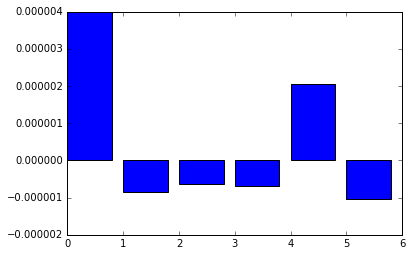

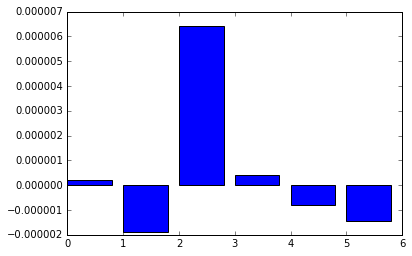

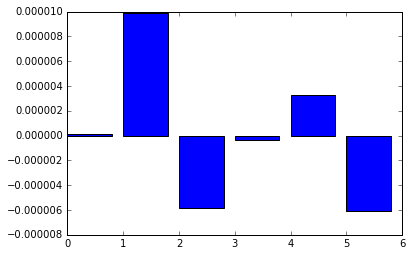

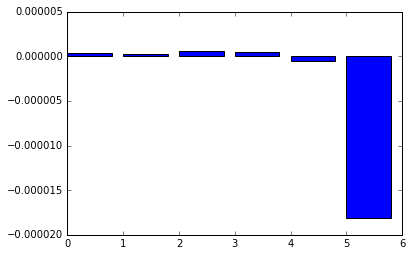

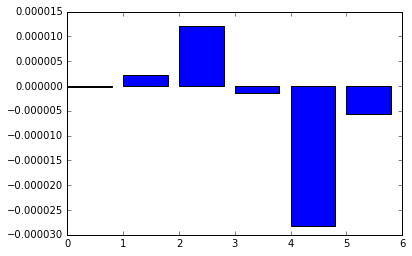

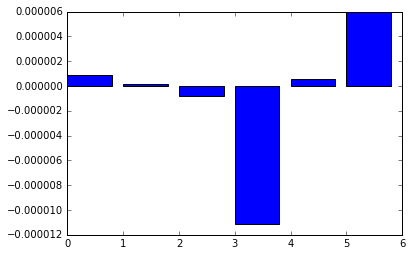

In [18]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt
from sklearn import preprocessing



data_center = data.copy()
data_center -= data_center.mean(axis=0)


ica = FastICA(n_components = 6, random_state=1)
ica.fit(data_center)
# Print the independent components
#print ica.components_

print ica.components_


for i in np.arange(6):
    plt.bar(np.arange(6), ica.components_[i])
    plt.show()

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: ICA is used to separate individual features from  a multivariate features. This allows us to define clear boundaries while analyzing the data. The first ICA contains Fresh and Detergent paper and it tells us that as Fresh increases Detergent paper also increases. The second ICA contains Grocery. The third contains Milk, Grocery, Delicatessen and as number of Milk increases Grocery and Delicatessen products decreases. The fourth contains Delicatessen. The fifth contains Detergent paper. The sixth contains Frozen and Delicatessen and as number of Frozen product decreases Delicatessen product increases. This information can be used to divide the customer base into different clusters.

 ##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

Advantages of K Means algorithm[1]:

1) It is fast, easy to understand and robust.

2) It is relatively efficient. It's efficiency is O(tknd), where n is # objects, k is # clusters, d is # dimension of each object, and t is # iterations. Normally, k, t, d << n.

3) It gives best results when datasets are separated from each other.

4) It does hard assignment which means that it assigns data points into one class exclusively.

Advantages of Gaussian Mixture Model Classifier (GMM):

1) It does soft assignment which means that it gives probability of a data point belonging to a class instead of assigining a point to one class exclusively. This is good as there can be datapoint which can have features of various classes. 


Although K means is a faster algorithm we will use Gaussian Mixture Model here because in real life the boundries between different classes may be blured and Gaussian Mixture Model is useful in those scenarios where there is no clear divide.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [19]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [20]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

#reduced_data = ?

reduced_data = PCA(n_components = 2).fit_transform(data_center)


print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [21]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

#clusters = ?

#clusters = KMeans(n_clusters = 2).fit(reduced_data)
clusters = GMM(n_components = 2).fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


In [22]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])


In [23]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

#centroids = ?

#centroids = clusters.cluster_centers_

centroids = clusters.means_

print centroids

[[-10810.23008886   9858.15532401]
 [  3308.39301792  -3017.01739698]]


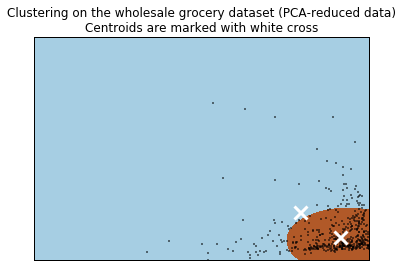

In [24]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [25]:
def gmm_cluster(n):    
    clusters = GMM(n_components = n).fit(reduced_data)
    print
    print clusters
    print
    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

    centroids = clusters.means_
    print
    print "centroids"
    print centroids
    print
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


centroids
[[  7007.45427668   4294.01360677]
 [-17858.6536729   10050.33930164]
 [   313.48539412  -6497.20521133]]



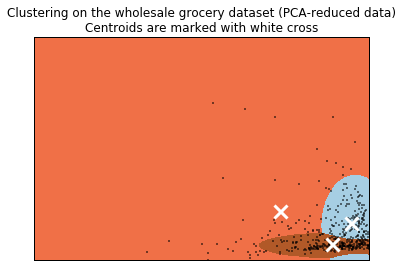

In [26]:
gmm_cluster(3)


GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)


centroids
[[ -9486.9742574   34645.20428228]
 [  2339.15204219  -6708.93065712]
 [  7174.54719282   5469.02876453]
 [-15372.37194307  -3334.43379857]]



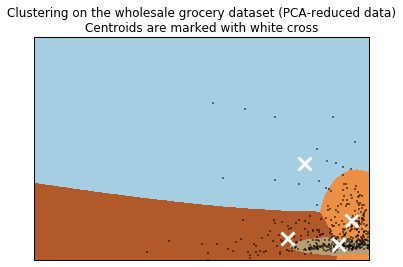

In [27]:
gmm_cluster(4)

In [28]:
def kmeans_cluster(n):    
    clusters = KMeans(n_clusters = n).fit(reduced_data)
    print
    print clusters
    print
    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

    centroids = clusters.cluster_centers_
    print
    print "centroids"
    print centroids
    print
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


centroids
[[-24088.33276689   1218.17938291]
 [  4175.31101293   -211.15109304]]



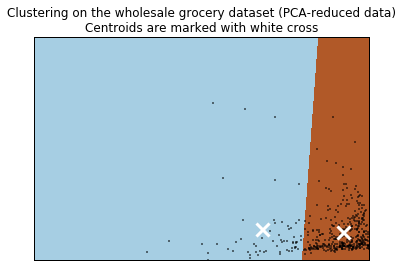

In [29]:
kmeans_cluster(2)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


centroids
[[  4156.8473703   -3062.39566743]
 [-23978.86566553  -4445.56611772]
 [  1339.44615464  25546.49074629]]



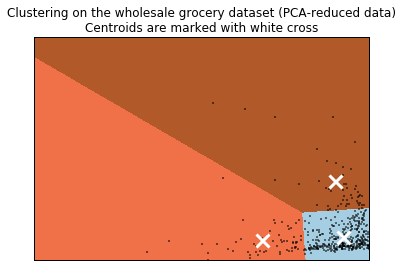

In [30]:
kmeans_cluster(3)


KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


centroids
[[  3542.08605212  -4936.7212132 ]
 [  5710.98964991  12661.45687292]
 [-24220.71188261  -4364.45560022]
 [-14537.71774395  61715.67085248]]



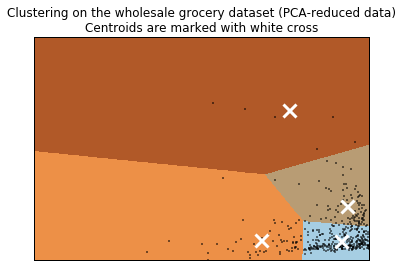

In [31]:
kmeans_cluster(4)

**Number of clusters**

After plotting several graphs of different number of clusters we take the plot with two clusters because as we increase the number of cluster to three, four or higher we can observe that the inter cluster distance is decreasing which seems like overfitting. Therefore, it is appropriate to take the plot with two clusters.

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central objects in each cluster represents average customer in that particular category. There are two main categories of customer are the small business and the large business. The cross on the right represents the small businesses and the one on the left represents the big businesses.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: Principle component analysis was used to help in the reduction of dimensions. This was done by selecting the first two principle components which explained about 86% of the data. This helped is dimensionality reduction and helped us visualize the data. By reducing the dimensionality. After PCA analysis  Gaussian mixture model was used to discover the different clusters. Unlike the K means algorithm, which does hard assignment, the gaussian mixture model does soft assignments which is good when the boundary between different clusters is not clear. Since in this data set the boundary between the customers are blurred it is good to use Gaussian mixture model instead of K means. 

**9)** How would you use that technique to help the company design new experiments?

Answer: After separating the two classes of customers we can try changes in one class of customers without effecting the other class to optimize the needs of the customers. For example if we want to change delivery options they can change it for one class without affecting the other class.

**10)** How would you use that data to help you predict future customer needs?

Answer: Using unsupervised learning we have separated the customers into two different categories. Now we can label the customers in the two different categories and use this(customers in different category separately) as input to a supervised learning algorithm which can then be used to determine what kind of products or delivery method a future customer might prefer.

References:

[1] [K Means](https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm)
